# **Examining Income Inequality Using Census Income**

# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#**Exploratory Data Analysis (EDA)**



In [ ]:
#Importing the dataset
df = pd.read_csv("Census Income.csv")

In [ ]:
# Display the first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Display basic statistics of Numerical and Categorical Features.
df.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
# Checking the number of missing values in each column.
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [ ]:
# Display the dimensions of the data set.
df.shape

(48842, 15)

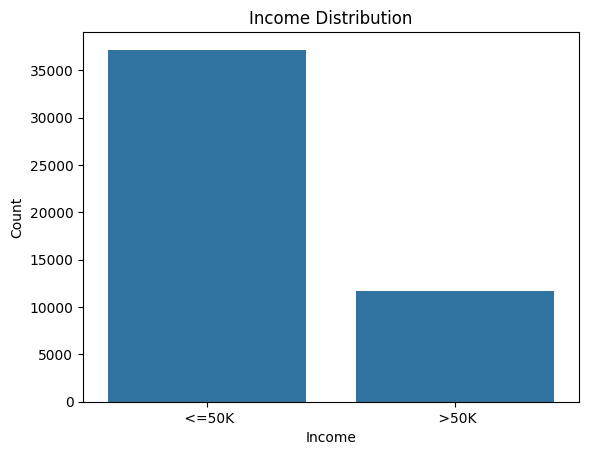

In [ ]:
# Create a count plot using seaborn for the 'Income' column in the dataframe.
sns.countplot(x='Income', data=df)
plt.title("Income Distribution")
plt.xlabel('Income')
plt.ylabel("Count")
plt.show()

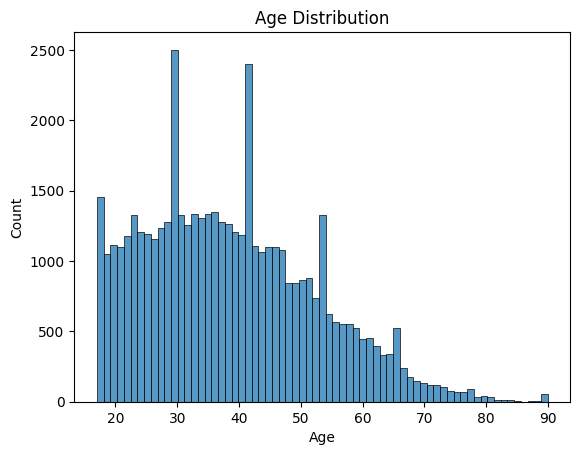

In [ ]:
# Create a histogram using seaborn for the 'age' column in the dataframe.
# The 'bins' parameter is set to auto.
sns.histplot(x='age', data=df, bins = "auto")
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

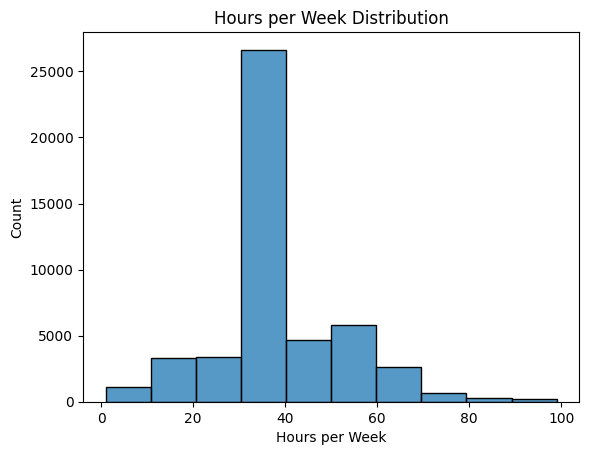

In [ ]:
# Create a histogram using seaborn for the ''hours-per-week' column in the dataframe.
# The 'bins' parameter is set to 10.
sns.histplot(x='hours-per-week', data=df,bins = 10)
plt.title("Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.show()

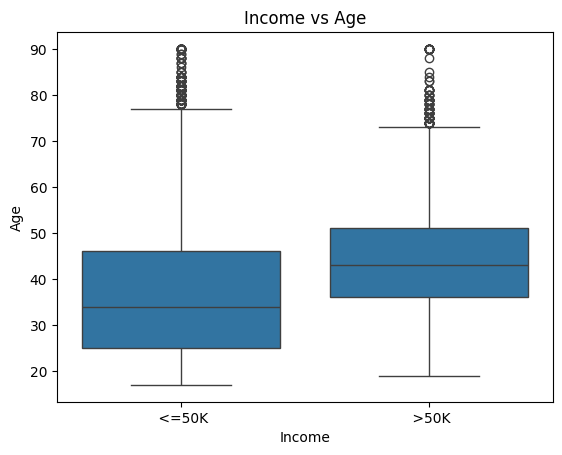

In [ ]:
# Creating a box plot to visualize the distribution of 'age' across 'Income' categories.
sns.boxplot(x='Income', y='age', data=df)
plt.title("Income vs Age")
plt.xlabel('Income')
plt.ylabel("Age")
plt.show()

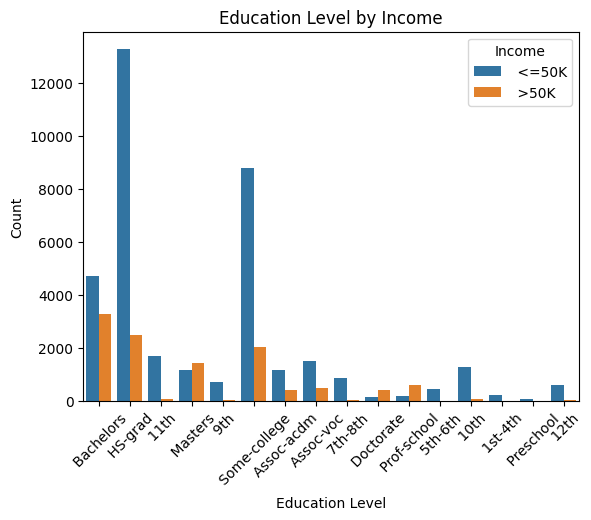

In [ ]:
# Creating a count plot to visualize the count of education levels grouped by income categories.
sns.countplot(x='education', hue='Income', data=df)
plt.title("Education Level by Income")
plt.xlabel('Education Level')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#**Data Pre-processing**

### Taking care of missing data

In [ ]:
# Remove rows where ["workclass","occupation"] has missing values.
df = df.dropna(subset=["workclass","occupation"])

# Checking the number of missing values in each column after handling the missing values.
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


### Encoding categorical data

In [ ]:
# Retrieve and display all column names of the DataFrame.
cols = df.columns
cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [ ]:
# Extract and display the names of all numeric columns in the DataFrame.
num_cols = df._get_numeric_data().columns
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
# Extracting the categorical columns by deducting the numerical columns from the list of column names.
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['occupation',
 'relationship',
 'Income',
 'workclass',
 'marital-status',
 'race',
 'education',
 'native-country',
 'sex']

In [ ]:
# Define a list of categorical columns that will undergo label encoding.
le_cat_cols =  ["Income","sex"]
le_cat_cols

['Income', 'sex']

In [ ]:
# Define a list of columns that will undergo One-Hot encoding
ohe_cat_cols = list(set(cat_cols) - set(le_cat_cols))
ohe_cat_cols

['occupation',
 'relationship',
 'workclass',
 'marital-status',
 'race',
 'education',
 'native-country']

In [ ]:
# Perform One-Hot Encoding on the categorical columns identified in 'ohe_cat_cols'.
df_encoded = pd.get_dummies(df, columns=ohe_cat_cols)

# Replace boolean values (True/False) with integers (1/0) in the resulting DataFrame.
df = df_encoded.replace({True: 1, False: 0})

<ipython-input-19-cf58bc34bf89>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df_encoded.replace({True: 1, False: 0})


In [ ]:
# Apply Label encoding to ("sex", "Income") columns in the df_encoded;
label_encoder = LabelEncoder()
df_encoded[le_cat_cols] = df_encoded[le_cat_cols].apply(label_encoder.fit_transform)

In [ ]:
# Display the first five rows of the data frame after encoding the data.
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Income,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,Male,2174,0,40,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display the dimensions of the data set after doing encoding.
df.shape

(46033, 105)

### Define features

In [ ]:
# Independend variable
X = df_encoded.drop("Income", axis = 1)

# Dependent variable
y = df_encoded["Income"]

In [ ]:
print("First 10 rows of independent variables (X):")
print(X[:10])

First 10 rows of independent variables (X):
   age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
0   39   77516             13    1          2174             0   
1   50   83311             13    1             0             0   
2   38  215646              9    1             0             0   
3   53  234721              7    1             0             0   
4   28  338409             13    0             0             0   
5   37  284582             14    0             0             0   
6   49  160187              5    0             0             0   
7   52  209642              9    1             0             0   
8   31   45781             14    0         14084             0   
9   42  159449             13    1          5178             0   

   hours-per-week  occupation_ Adm-clerical  occupation_ Armed-Forces  \
0              40                      True                     False   
1              13                     False                     False   
2         

In [ ]:
print("First 10 rows of dependent variables (y):")
print(y[:10])

First 10 rows of dependent variables (y):
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: Income, dtype: int64


### Splitting the dataset into the Training and Test

In [ ]:
# Splitting the data into training and testing sets
# X_train, X_test: Independent variables
# y_train, y_test: Dependent variable
# train_size = 80% and test_size= 20%
# random_state=1: Ensures same split every time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size = 0.2, random_state = 1)

In [ ]:
print("First 5 rows of independent variables (X_train):")
print(X_train[:5])

First 5 rows of independent variables (X_train):
       age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
43565   48   70584              9    1             0             0   
14922   42   99679              9    1             0             0   
32020   21  211968             10    0             0          1762   
19006   42  230684              9    1          5178             0   
14879   51   97005              4    1             0             0   

       hours-per-week  occupation_ Adm-clerical  occupation_ Armed-Forces  \
43565              40                     False                     False   
14922              60                     False                     False   
32020              28                     False                     False   
19006              50                     False                     False   
14879              40                     False                     False   

       occupation_ Craft-repair  ...  native-country_ Portugal  \
4

In [ ]:
print("First 5 rows of dependent variables (y_train):")
print(y_train[:5])

First 5 rows of dependent variables (y_train):
43565    0
14922    1
32020    0
19006    1
14879    0
Name: Income, dtype: int64


In [ ]:
print("First 5 rows of independent variables (X_test):")
print(X_test[:5])

First 5 rows of independent variables (X_test):
       age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
11000   20  216825              9    0             0             0   
17769   42  188738              9    1             0          1977   
46035   36  199217              9    1             0             0   
28818   35  233571              9    0             0             0   
30092   68  261897              6    1             0             0   

       hours-per-week  occupation_ Adm-clerical  occupation_ Armed-Forces  \
11000              25                     False                     False   
17769              60                     False                     False   
46035              40                     False                     False   
28818              50                     False                     False   
30092              20                     False                     False   

       occupation_ Craft-repair  ...  native-country_ Portugal  \
11

In [ ]:
print("First 5 rows of dependent variables (y_test):")
print(y_test[:5])

First 5 rows of dependent variables (y_test):
11000    0
17769    1
46035    0
28818    0
30092    0
Name: Income, dtype: int64


### Handling Class Imbalance

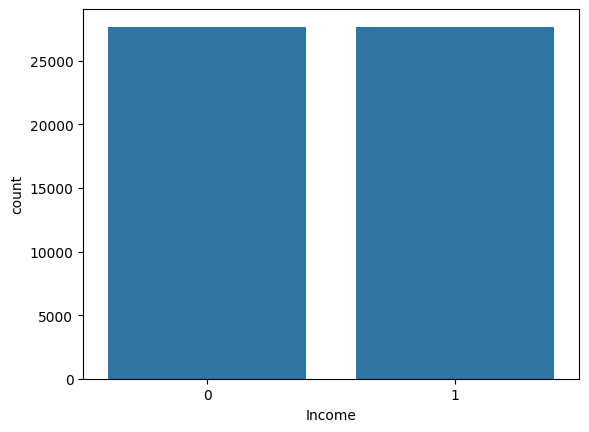

In [ ]:
# Applying SMOTE to the training data to balance the classes
from imblearn.over_sampling import SMOTE
resampler= SMOTE(random_state=0)
X_train_oversampled,y_train_oversampled=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_oversampled)
plt.show()

### Feature Scaling

In [ ]:
# Standardizing the numerical columns in the training set (X_train) and testing set (X_test).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_oversampled[num_cols] = sc.fit_transform(X_train_oversampled[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

# K_Nearest_Neighbors Classification Model

### Training the K-NN model on the Training set

In [ ]:
# Initialize the K-Nearest Neighbors classifier with 5 neighbors and the Minkowski distance metric (equivalent to Euclidean distance when p=2)
# Train the classifier on the training data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train_oversampled, y_train_oversampled)

KNeighborsClassifier()

In [ ]:
# Comparing the predicted result with actual result.
knn_y_pred = knn_classifier.predict(X_test)
print(f"Model Predictions vs Actual Values:\n {np.concatenate((knn_y_pred.reshape(len(knn_y_pred),1), y_test.values.reshape(len(y_test),1)),1)}")

Model Predictions vs Actual Values:
 [[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 0]
 [0 1]]


### K-NN Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Calculate and print the accuracy of the model by comparing the predicted labels with the true labels
knn_acc = accuracy_score(y_test, knn_y_pred)
print("K-NN Accuracy:",knn_acc)
print("----------------------------------------------------")
# Compute and print the confusion matrix to evaluate the performance of the classification model
knn_cm = confusion_matrix(y_test, knn_y_pred)
print(f"K-NN Confusion Matrix:\n{knn_cm}")
print("----------------------------------------------------")
# Print the classification report to evaluate model performance.
knn_report = classification_report(y_test, knn_y_pred)
print(f"K-NN Classification Report:\n {knn_report}")

K-NN Accuracy: 0.8174215270989464
----------------------------------------------------
K-NN Confusion Matrix:
[[6075  862]
 [ 819 1451]]
----------------------------------------------------
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6937
           1       0.63      0.64      0.63      2270

    accuracy                           0.82      9207
   macro avg       0.75      0.76      0.76      9207
weighted avg       0.82      0.82      0.82      9207



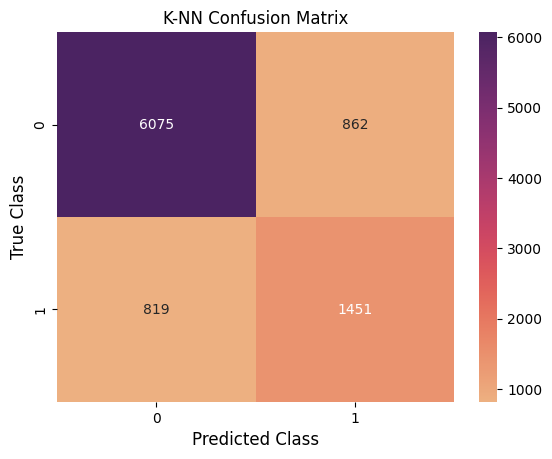

In [ ]:
# Visualize the confusion matrix using a heatmap with annotations for easier interpretation
# Customize the heatmap with the 'flare' color map, and label axes and title for clarity.
ax = sns.heatmap(knn_cm, cmap='flare' , annot=True, fmt='d')
plt.title("K-NN Confusion Matrix", fontsize=12)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class",fontsize=12)

plt.show()

# Random Forest Classification Model

### Training the Random Forest model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
rf_classifier.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
# Comparing the predicted result with actual result.
rf_y_pred = rf_classifier.predict(X_test)
print(f"Model Predictions vs Actual Values:\n {np.concatenate((rf_y_pred.reshape(len(rf_y_pred),1), y_test.values.reshape(len(y_test),1)),1)}")

Model Predictions vs Actual Values:
 [[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 1]]


### Random Forest Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Calculate and print the accuracy of the model by comparing the predicted labels with the true labels
rf_acc = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:",rf_acc)
print("----------------------------------------------------")
# Compute and print the confusion matrix to evaluate the performance of the classification model
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(f"Random Forest Confusion Matrix:\n{rf_cm}")
print("----------------------------------------------------")
# Print the classification report to evaluate model performance.
rf_report = classification_report(y_test, rf_y_pred)
print(f"Random Forest Classification Report:\n{rf_report}")

Random Forest Accuracy: 0.8444661670468122
----------------------------------------------------
Random Forest Confusion Matrix:
[[6379  558]
 [ 874 1396]]
----------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6937
           1       0.71      0.61      0.66      2270

    accuracy                           0.84      9207
   macro avg       0.80      0.77      0.78      9207
weighted avg       0.84      0.84      0.84      9207



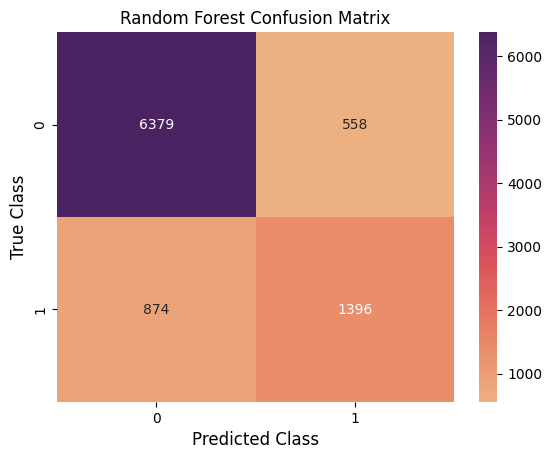

In [ ]:
# Visualize the confusion matrix using a heatmap with annotations for easier interpretation
# Customize the heatmap with the 'flare' color map, and label axes and title for clarity
ax = sns.heatmap(rf_cm, cmap='flare' , annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix", fontsize=12)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class",fontsize=12)

plt.show()